In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

%matplotlib inline
train = pd.read_csv('train.csv')
train_sample = train.sample(train.shape[0]/2)
test = pd.read_csv('test.csv')

In [67]:
def remove_nas(dataframe, percent):
    null_data = dataframe.isnull().sum()
    data_to_remove = null_data[null_data > dataframe.shape[0]*percent].index.tolist()
    dataframe.drop(data_to_remove,1)
    return dataframe

In [68]:
def int_data(dataframe):
    data_type = dataframe.dtypes
    int_columns_1 = data_type[data_type=='int64'].index.tolist()
    int_columns_2 = data_type[data_type=='float64'].index.tolist()
    int_columns = int_columns_1 + int_columns_2
    int_dataframe = dataframe[int_columns]
    return int_dataframe

In [69]:
def process_data(dataframe):
    var = [e for e in dataframe.columns.values.tolist() if e not in ('Id', 'SalePrice')]
    independent_var = dataframe[var]
    independent_var['TotalSF'] = independent_var['1stFlrSF'] + independent_var['2ndFlrSF']+ independent_var['TotalBsmtSF']
    independent_var.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'],1, inplace=True)
    
    num_col = independent_var.shape[1]
    graph_dimension = int(round(math.sqrt(num_col)))

    f, ax = plt.subplots(graph_dimension, graph_dimension,figsize=(18,12))
    plt.subplots_adjust( hspace=0.3 )
    plt.subplots_adjust( wspace=0.04 )

    y = dataframe['SalePrice']
    counter = 0

    list_of_predictors =[]

    for i in range(graph_dimension):
        for j in range(graph_dimension):
            ax[i][j].get_yaxis().set_ticks([])
            ax[i][j].get_xaxis().set_ticks([])
            if counter >= num_col:
                continue
            else:
                x = independent_var.iloc[:, counter]
                ax[i][j].scatter(x,y)
                ax[i][j].set_title(independent_var.columns.values[counter])
            
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            
                if r_value**2 > 0.3:
                    list_of_predictors.append(independent_var.columns.values[counter])
                counter = counter + 1

    final_int_train = independent_var[list_of_predictors]
    return dataframe, final_int_train


/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


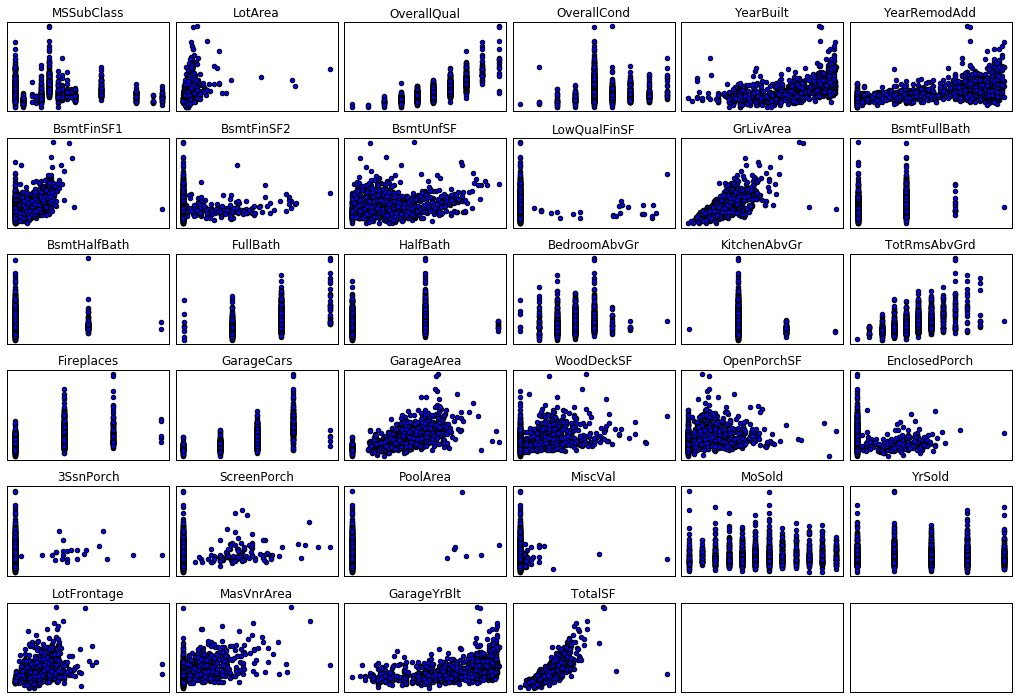

In [65]:
no_na_train = remove_nas(train, 0.1)
int_train = int_data(no_na_train)
int_data_whole, processed_data_whole = process_data(int_train)

/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


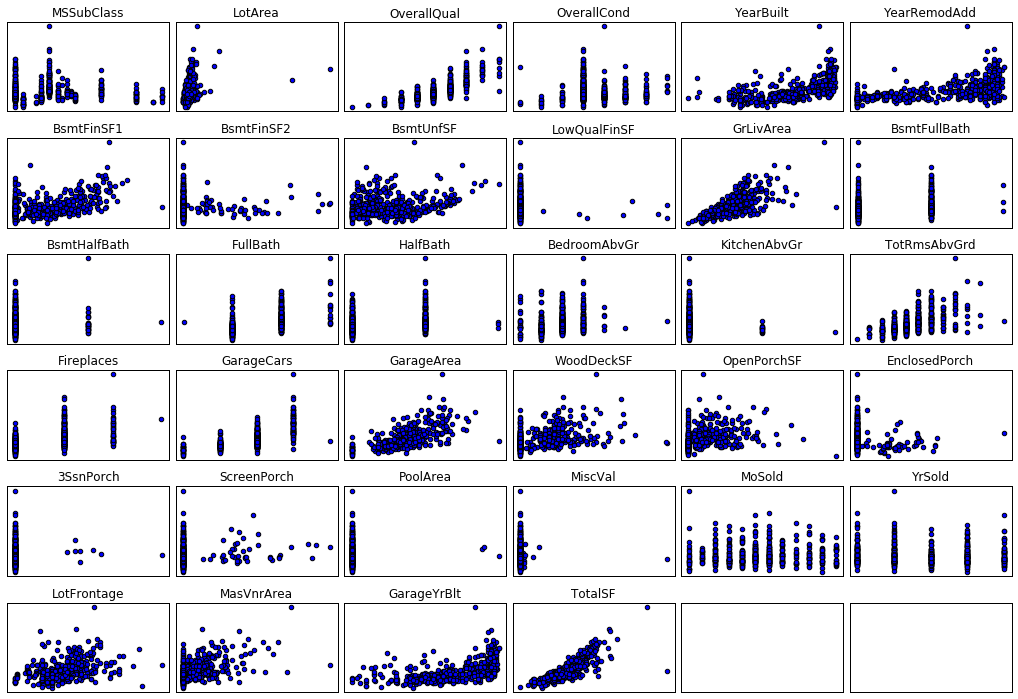

In [77]:
train_sample = train.sample(500)
no_na_train_sample = remove_nas(train_sample, 0.1)
int_train_sample = int_data(no_na_train_sample)
int_data, processed_data = process_data(int_train_sample)

In [75]:
no_na_test = remove_nas(test, 0.1)
int_test = int_data(no_na_test)

In [76]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold



In [78]:
lm = linear_model.LinearRegression()
lm.fit(processed_data.values, int_data['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


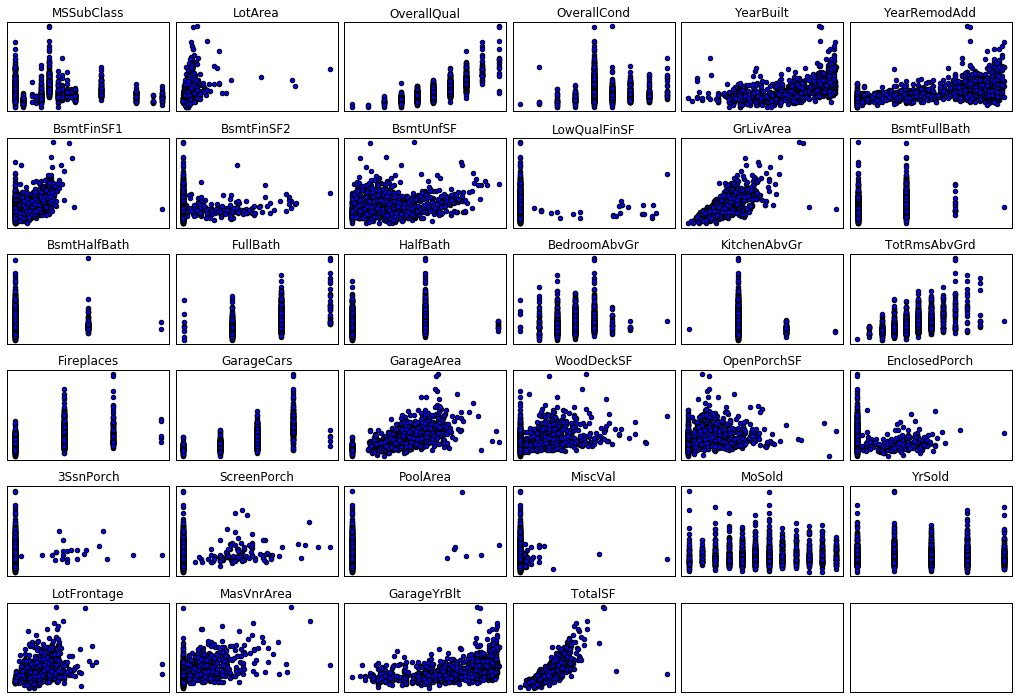

In [79]:
int_data_whole, processed_data_whole = process_data(int_train)

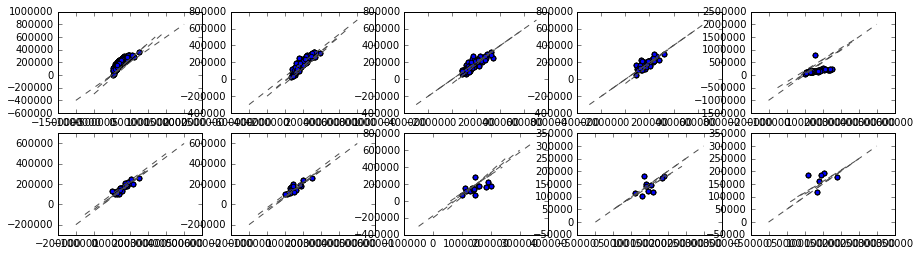

In [82]:
x_train, x_test, y_train, y_test = train_test_split(processed_data_whole.values, int_data_whole['SalePrice'].as_matrix(), test_size=0.3)
k_fold = StratifiedKFold(y_train.ravel(), n_folds=10)

lr = linear_model.LinearRegression()
lr.fit(x_train,y_train.ravel().T)


times=5

f, ax = plt.subplots(2,5,figsize=(15, 4))

for i in range(times):
    counter = 0
    for train_indx, test_indx in k_fold:
        val_train_x, val_train_y =x_train[train_indx], y_train[train_indx]
        val_test_x, val_test_y = x_train[test_indx], y_train[test_indx]
        lr.fit(val_train_x, val_train_y.ravel().T)
        y_pred = lr.predict(val_test_x)
        ax[counter/5][counter % 5].scatter(val_test_y, y_pred)
        ax[counter/5][counter % 5].plot(ax[counter/5][counter % 5].get_xlim(), ax[counter/5][counter % 5].get_ylim(), ls="--", c=".3")
        counter += 1

In [58]:
processed_data

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF
420,7,1344,2,8,4,784,2688
1330,8,1588,2,7,3,825,3176
641,7,1929,2,7,2,650,2986
1002,8,1574,2,7,3,824,3148
839,5,1200,1,6,1,240,1968
1320,6,1478,1,6,2,442,2956
1084,6,1498,2,6,2,409,2189
705,4,1092,2,7,0,0,1092
1351,6,1716,1,8,2,490,2574
1073,6,1426,1,6,2,440,2116
